# Analysis of Anime Series and Movies

## Content

1) Introduction: Anime Series and Movies 

2) Data Description 

3) Data preparation

4) Data analysis and vizualization

5) Conclusion


## 1) Introduction Anime Series and Movies 

Anime (Japanese: アニメ) is hand-drawn and computer animation originating from Japan. In Japan and in Japanese, anime (a term derived from the English word animation) describes all animated works, regardless of style or origin. However, outside of Japan and in English, anime is colloquial for Japanese animation and refers specifically to animation produced in Japan. Animation produced outside of Japan with similar style to Japanese animation is referred to as anime-influenced animation.

In general, there are two types of anime formats such as series and movies. The majority of anime series consist of 12 episodes each of which lasts about 24 minutes including openings and endings. Almost all anime movies last approximately 1.5 hours.

As a common series and movies animes have ratings and votes. Also, it should be mentioned that titles have been produced in different genres such as thriller, comedy, romance, isekai(transportation and life in another world), shōnen, science, etc. 

**Sources:**

    1) https://en.wikipedia.org/wiki/Anime 
    2) https://www.looper.com/189420/anime-genres-explained/
    
<img src = 'https://i.ytimg.com/vi/k_CqnkHyU1U/maxresdefault.jpg'>


## 2) Data Description

The dataset includes information about anime's title, genre, year, studio, ratings, etc. My investigation will define the rate of interest and according to the ratings and votes among different titles and genres. Also, there is a huge fact as publication year because since the beginning of 21st century each year interest rate is increasing.

The dataset consists of 18 columns and 14578 rows which allows us to complete and holistic analysis.

Our analysis will be based on data of 15 June, 2020 obtained from Anime Planet (https://www.anime-planet.com/).

Description of columns: 

* Title - the name of the anime 

* mediaType - either title is TV series or movie 

* eps - number of episodes in tv series this number varies for movies this number is 1

* duration - for TV series this number is Nan for movies in minutes

* ongoing - has datatype boolean so in case this title is currently producing value is true, otherwise it is false

* startYr - year when title started to be animated

* finishYe - year when title's animation stopped

* sznOfRelease - season of animation(winter, spring or fall)

* description - brief description of title

* studios - studios which created title

* tags - genres of title

* contentWarn - warning about special genres relatively for the categories (PG-13, R, etc.)

* watched - number of users watched 

* watching - number of users who are currently watching 

* wantWatch - number of users who added title to list and want to watch it

* dropped - number of users who dropped title from the any previous list 

* rating - average rating given by users

* votes - number of votes that contribute to rating

### **The following questions will be applied to make an analysis for my final project:**

1) What media type has the highest ratings among other media types?

2) Does the amount of episodes is the reason to drop any title?

3) Is there any effect of rating on amount of watched people?

4) Which animation studio has the highest sum of ratings?

5) How does violation content warning influence on the interest of consumers?



## 3) Data prepartion - cleaning, shaping, manipulation

### Data preparation

* In this section we have to alter some column names and values to prerare it for the analysis

* Get rid of special characters in columns with string data type

* Convert float values into integer datatype

* Data Validation

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# from wordcloud import WordCloud
# from PIL import Image
# import random


In [38]:
# importing csv file
anime = pd.read_csv("anime.csv")
anime.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [39]:
# change column name duration to duration in minutes
anime.rename(columns = {'duration' : 'duration (minutes)'}, inplace = True)
anime.head(5)

,title,mediaType,eps,duration (minutes),ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [40]:
# converting datatype of columns which contains numeric values to int datatype
anime = anime.fillna(0)
anime = anime.astype({"eps": "int", "duration (minutes)": "int", "startYr": "int", "finishYr": "int", "watched": "int", "votes": "int"})
anime.head(5)

,title,mediaType,eps,duration (minutes),ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64,0,False,2009,2010,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707,14351,25810,2656,4.702,86547
1,your name.,Movie,1,107,False,2016,2016,0,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831,1453,21733,124,4.663,43960
2,A Silent Voice,Movie,1,130,False,2016,2016,0,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892,946,17148,132,4.661,33752
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10,0,False,2016,2016,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134,2183,8082,167,4.660,17422
4,Attack on Titan 3rd Season: Part II,TV,10,0,False,2019,2019,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308,3217,7864,174,4.650,15789


In [41]:
# deleting all extra characters from list 
anime['studios'] =anime['studios'].apply(lambda x: eval(x))
anime.head()

,title,mediaType,eps,duration (minutes),ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64,0,False,2009,2010,Spring,The foundation of alchemy is based on the law ...,[Bones],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707,14351,25810,2656,4.702,86547
1,your name.,Movie,1,107,False,2016,2016,0,Mitsuha and Taki are two total strangers livin...,[CoMix Wave Films],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831,1453,21733,124,4.663,43960
2,A Silent Voice,Movie,1,130,False,2016,2016,0,"After transferring into a new school, a deaf g...",[Kyoto Animation],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892,946,17148,132,4.661,33752
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10,0,False,2016,2016,Fall,"Picking up where the second season ended, the ...",[Production I.G],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134,2183,8082,167,4.660,17422
4,Attack on Titan 3rd Season: Part II,TV,10,0,False,2019,2019,Spring,The battle to retake Wall Maria begins now! Wi...,[Wit Studio],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308,3217,7864,174,4.650,15789


In [42]:
# here we will replace [] values in columns by Nan value 
anime.replace('[]',np.nan, inplace = True)
anime.head(5)

,title,mediaType,eps,duration (minutes),ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64,0,False,2009,2010,Spring,The foundation of alchemy is based on the law ...,[Bones],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707,14351,25810,2656,4.702,86547
1,your name.,Movie,1,107,False,2016,2016,0,Mitsuha and Taki are two total strangers livin...,[CoMix Wave Films],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",NaN,58831,1453,21733,124,4.663,43960
2,A Silent Voice,Movie,1,130,False,2016,2016,0,"After transferring into a new school, a deaf g...",[Kyoto Animation],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892,946,17148,132,4.661,33752
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10,0,False,2016,2016,Fall,"Picking up where the second season ended, the ...",[Production I.G],"['Shounen', 'Sports', 'Animeism', 'School Club...",NaN,25134,2183,8082,167,4.660,17422
4,Attack on Titan 3rd Season: Part II,TV,10,0,False,2019,2019,Spring,The battle to retake Wall Maria begins now! Wi...,[Wit Studio],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308,3217,7864,174,4.650,15789


#### **Data Validation**

In [43]:
# now we should determine is the any missing data and assume reasons why
anime_missing = pd.DataFrame()
anime_missing["Columns"] = list(anime.columns)
anime_missing["Count"] = list(anime.count())
anime_missing[:]

,Columns,Count
0,title,14578
1,mediaType,14578
2,eps,14578
3,duration (minutes),14578
4,ongoing,14578
5,startYr,14578
6,finishYr,14578
7,sznOfRelease,14578
8,description,14578
9,studios,14578


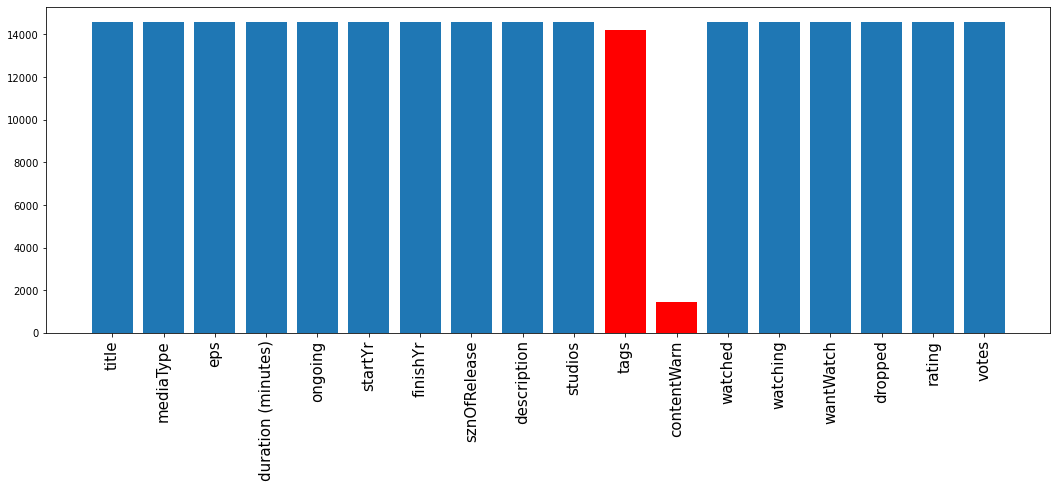

In [44]:
# bar grapgh which compares each column's amount to maximum which is 14578
plt.figure(figsize=(18,6))

missing = [x if x < 14578 else 0 for x in anime_missing["Count"]]
plt.bar(anime_missing["Columns"], anime_missing["Count"])
plt.bar(anime_missing["Columns"], missing , color = 'red')#color to indicate those columns where there is not enough data
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

As the result of the code, we can see that there are 2 column where data is missing
Which is because of the web-site administrators work 

## 4) Data analysis and vizualization


### **Q1 What media type has the highest ratings among other media types?**

In [45]:
# describing key features of rating column
anime['rating'].describe()

count    14578.000000
mean         2.448887
std          1.339006
min          0.000000
25%          1.795000
50%          2.708000
75%          3.479000
max          4.702000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='mediaType'>

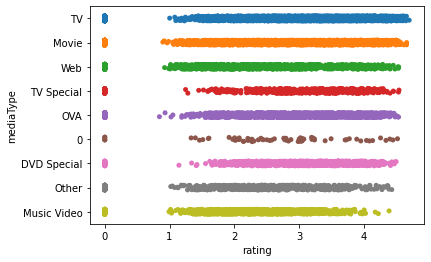

In [46]:
# plotting graph which has two arguments, rating and mediaType
sns.stripplot(anime['rating'],anime['mediaType'])

As the result we can observe that TV series media type animes received highest grade among other media types

### **Q2 Does the amount of episodes is the reason to drop any title?**

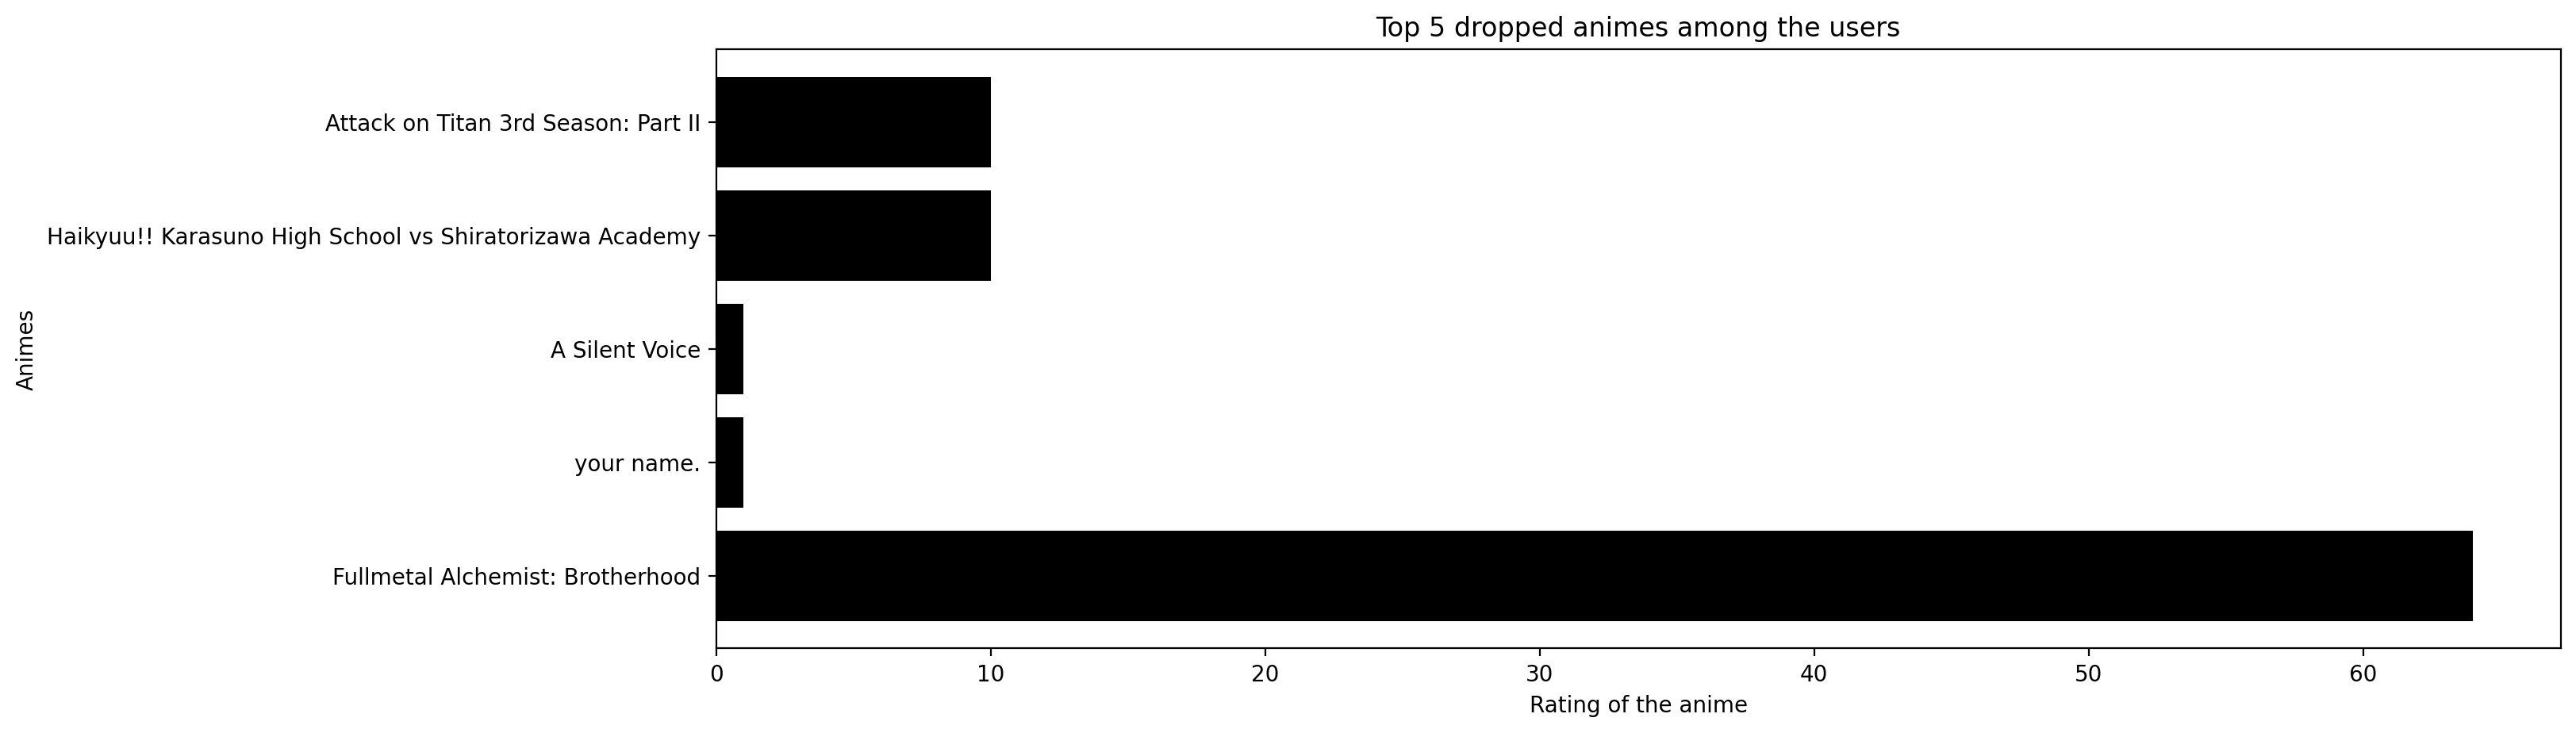

In [47]:
# plotting graph 
plt.figure(figsize=(15, 5), dpi=200)

plt.barh(anime['title'].head(5), anime['eps'].head(), color='black')
plt.ylabel('Animes')
plt.xlabel('Rating of the anime')
plt.title('Top 5 dropped animes among the users');


In [48]:
# displaying need columns to represent required statistics
display(anime[['rating','title','dropped', 'studios']].sort_values('dropped', ascending = False).set_index('title').head(10))

,rating,dropped,studios
title,,,
Bleach,4.118,19481,[Studio Pierrot]
Naruto Shippuden,4.269,12813,[Studio Pierrot]
One Piece,4.402,12445,[Toei Animation]
Naruto,4.080,12124,[Studio Pierrot]
Fairy Tail,4.303,9437,"[A-1 Pictures, Satelight]"
InuYasha,3.937,8362,[Sunrise]
Death Note,4.501,7830,[MADHOUSE]
Pokemon,3.535,6915,[OLM]
Soul Eater,4.276,6174,[Bones]


In [49]:
anime.loc[1014,:]

title                                                            Bleach
mediaType                                                            TV
eps                                                                 366
duration (minutes)                                                    0
ongoing                                                           False
startYr                                                            2004
finishYr                                                           2012
sznOfRelease                                                       Fall
description           Fifteen-year-old Ichigo Kurosaki is a typical ...
studios                                                [Studio Pierrot]
tags                  ['Action', 'Shounen', 'Afterlife', 'Shinigami'...
contentWarn                                                ['Violence']
watched                                                           53009
watching                                                        

In [50]:
anime.loc[561,:]

title                                                  Naruto Shippuden
mediaType                                                            TV
eps                                                                 500
duration (minutes)                                                    0
ongoing                                                           False
startYr                                                            2007
finishYr                                                           2017
sznOfRelease                                                     Winter
description           Two and a half years have passed since the end...
studios                                                [Studio Pierrot]
tags                  ['Action', 'Drama', 'Fantasy', 'Shounen', 'Han...
contentWarn                                                         NaN
watched                                                           38289
watching                                                        

In [51]:
anime.loc[239,:]

title                                                         One Piece
mediaType                                                            TV
eps                                                                 929
duration (minutes)                                                    0
ongoing                                                            True
startYr                                                            1999
finishYr                                                              0
sznOfRelease                                                       Fall
description           Long ago the infamous Gol D. Roger was the str...
studios                                                [Toei Animation]
tags                  ['Action', 'Adventure', 'Comedy', 'Fantasy', '...
contentWarn                                                         NaN
watched                                                               0
watching                                                        

In [52]:
anime.loc[1132,:]

title                                                            Naruto
mediaType                                                            TV
eps                                                                 220
duration (minutes)                                                    0
ongoing                                                           False
startYr                                                            2002
finishYr                                                           2007
sznOfRelease                                                       Fall
description           Naruto Uzumaki is a young ninja who bears a gr...
studios                                                [Studio Pierrot]
tags                  ['Action', 'Drama', 'Shounen', 'Japanese Mytho...
contentWarn                                                         NaN
watched                                                          119474
watching                                                        

In [53]:
anime.loc[470,:]

title                                                        Fairy Tail
mediaType                                                            TV
eps                                                                 175
duration (minutes)                                                    0
ongoing                                                           False
startYr                                                            2009
finishYr                                                           2013
sznOfRelease                                                       Fall
description           Lucy is a seventeen-year-old mage with the pow...
studios                                       [A-1 Pictures, Satelight]
tags                  ['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...
contentWarn                                                         NaN
watched                                                           59039
watching                                                        

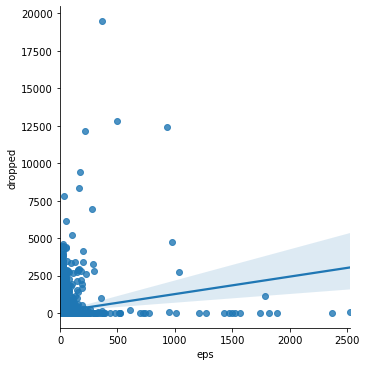

In [54]:
# plot which takes dropped and eps to arguments
sns.lmplot(x='eps',y='dropped', data = anime)

So now we can observe that the most dropped 5 anime titles have more than 150 episodes which is almost 60 hours of continuous viewing

### **Q3 Is there any effect of rating on amount of watched people?**

In [55]:
# assigning range of ratings 
anime['rating_range'] = 0
anime.loc[(anime['rating'] > 4.5) & (anime['rating'] <=5.0), 'rating_range'] = '4.5-5.0'
anime.loc[(anime['rating'] > 4.0) & (anime['rating'] <=4.5), 'rating_range'] = '4.0-4.5'
anime.loc[(anime['rating'] > 3.5) & (anime['rating'] <=4.0), 'rating_range'] = '3.5-4.0'
anime.loc[(anime['rating'] > 3.0) & (anime['rating'] <=3.5), 'rating_range'] = '3.0-3.5'
anime.loc[(anime['rating'] > 2.5) & (anime['rating'] <=3.0), 'rating_range'] = '2.5-3.0'
anime.loc[(anime['rating'] > 2.0) & (anime['rating'] <=2.5), 'rating_range'] = '2.0-2.5'
anime.loc[(anime['rating'] > 1.5) & (anime['rating'] <=2.0), 'rating_range'] = '1.5-2.0'
anime.loc[(anime['rating'] > 1.0) & (anime['rating'] <=1.5), 'rating_range'] = '1.0-1.5'
anime.loc[(anime['rating'] > 0.5) & (anime['rating'] <=1.0), 'rating_range'] = '0.5-1.0'
anime.loc[(anime['rating'] >= 0.0) & (anime['rating'] <=0.5), 'rating_range'] = '0.0-0.5'

<AxesSubplot:xlabel='rating_range'>

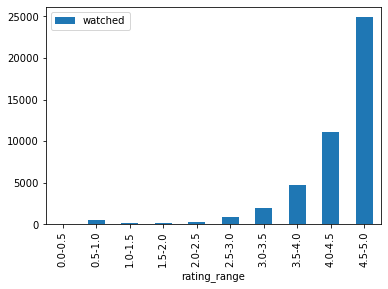

In [56]:
# there is clear observation that as well as rating is increasing watched amount is also growing up
anime[['rating_range','watched']].groupby(['rating_range']).mean().plot.bar()

Here we can see that as well as rating_range increases, at the same time amount of watched people is also grows

### Q4 Which animation studio has the highest sum of ratings?

In [57]:
# declaring empty array in order to insert there required list 
all_studios = []
for i in anime.studios:
    all_studios.extend(i)
    
print(all_studios[:10])

['Bones', 'CoMix Wave Films', 'Kyoto Animation', 'Production I.G', 'Wit Studio', 'ufotable', 'Production I.G', 'MADHOUSE', 'Sunrise', 'BN Pictures']


In [58]:
values, counts = np.unique(all_studios, return_counts=True)

In [59]:
values

array(['10GAUGE', '2:10 Animation', '3xCube', '5th Avenue', '8 Pan',
       '8-Bit', 'A-1 Pictures', 'A-Line', 'A-Real', 'A.C.G.T.',
       'ACC Production', 'AIC', 'AIC A.S.T.A.', 'AIC Build',
       'AIC Classic', 'AIC Frontier', 'AIC PLUS+', 'AIC Spirits',
       'ALBACROW', 'ARMS', 'ARTMIC Studios', 'ASK Animation', 'AXsiZ',
       'Acca effe', 'Actas', 'Agent 21', 'Ajia-do', 'Amber Film Works',
       'An DerCen', 'Anima&Co.', 'Animation 21', 'Animation Do',
       'Animation Planet', 'Anime R', 'Anpro', 'Arcturus', 'Artland',
       'Arvo Animation', 'Asahi Production', 'Ascension',
       'Ashi Productions', 'Assez Finaud Fabric.', 'Asura Film', 'Aubec',
       'Automatic Flowers Studio', 'BEE TRAIN', 'BLADE', 'BN Pictures',
       'Bakken Record', 'Barnum Laboratory', 'BeSTACK', 'Beat Frog',
       'Bee Media', 'Bibury Animation Studios', 'Big Bang', 'BigFireBird',
       'Blaze Studio', 'Bones', 'Bouncy', 'Bridge', 'Broccoli', 'Buemon',
       'Build Up', 'C&D Distribution', '

In [60]:
anime1 = pd.DataFrame({'Studios': values, 'sum of ratings': counts})
anime1.sort_values('sum of ratings', ascending=False, inplace=True)
anime1.head()

,Studios,sum of ratings
447,Toei Animation,699
420,Sunrise,455
427,TMS Entertainment,381
180,J.C. Staff,358
226,MADHOUSE,352


In [61]:
# assigning top 5 most valued studios to represent data correctly 
largest_five= anime1.nlargest(5,'sum of ratings')

Text(0.5, 1.0, 'Sum of ratings among studios')

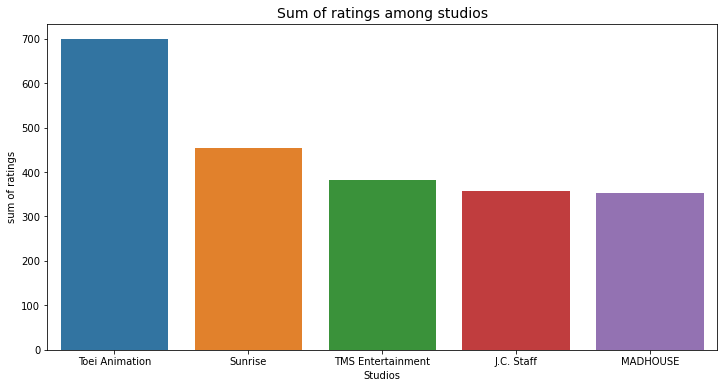

In [62]:
# plotting top 5 most rated studios
plt.figure(figsize = (12,6))
sns.barplot(x='Studios', y='sum of ratings', data=largest_five)
plt.xlabel(xlabel='Studios')
plt.ylabel(ylabel='sum of ratings')
plt.title('Sum of ratings among studios', fontsize = 14)

As the result we can see the animation studio(Toei Animation) which has the highest total rating among all studios

### Q5 Does content warning influence on choise of anime viewer

<AxesSubplot:title={'center':'contentWarn'}, xlabel='dropped', ylabel='contentWarn'>

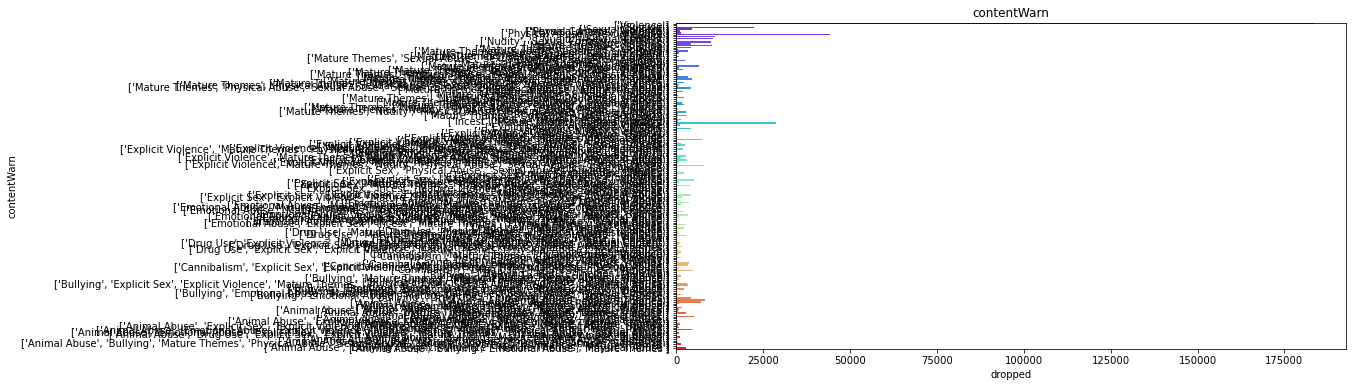

In [63]:
tags_depend = tags_depend.sort_values(by='contentWarn', ascending=False)
fig, ax = plt.subplots(figsize = (12,6))
plt.title('contentWarn')
sns.barplot(y = tags_depend['contentWarn'],x = tags_depend['dropped'], palette='rainbow')

In [64]:
# figure which represents relation between watching amount and content warning

fig = px.funnel(anime, x=anime['watching'], y=anime['contentWarn'])
fig.show()

In [65]:
# figure which represents relation between dropped amount and content warning
fig = px.funnel(anime, x=anime['dropped'], y=anime['contentWarn'])
fig.show()

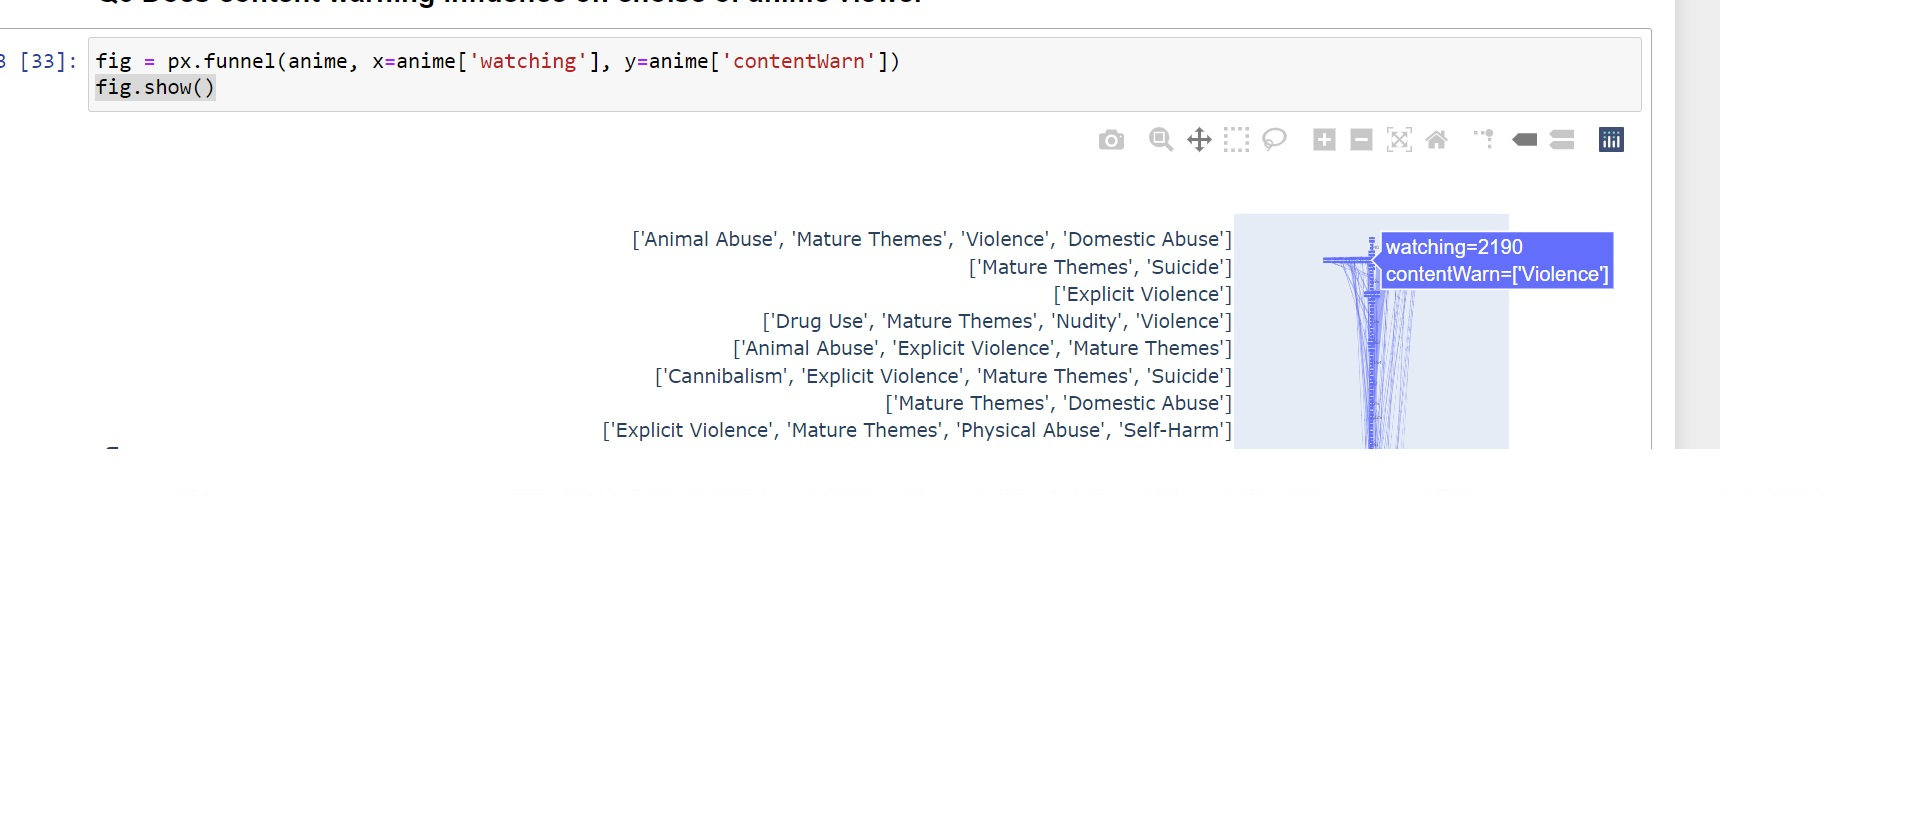

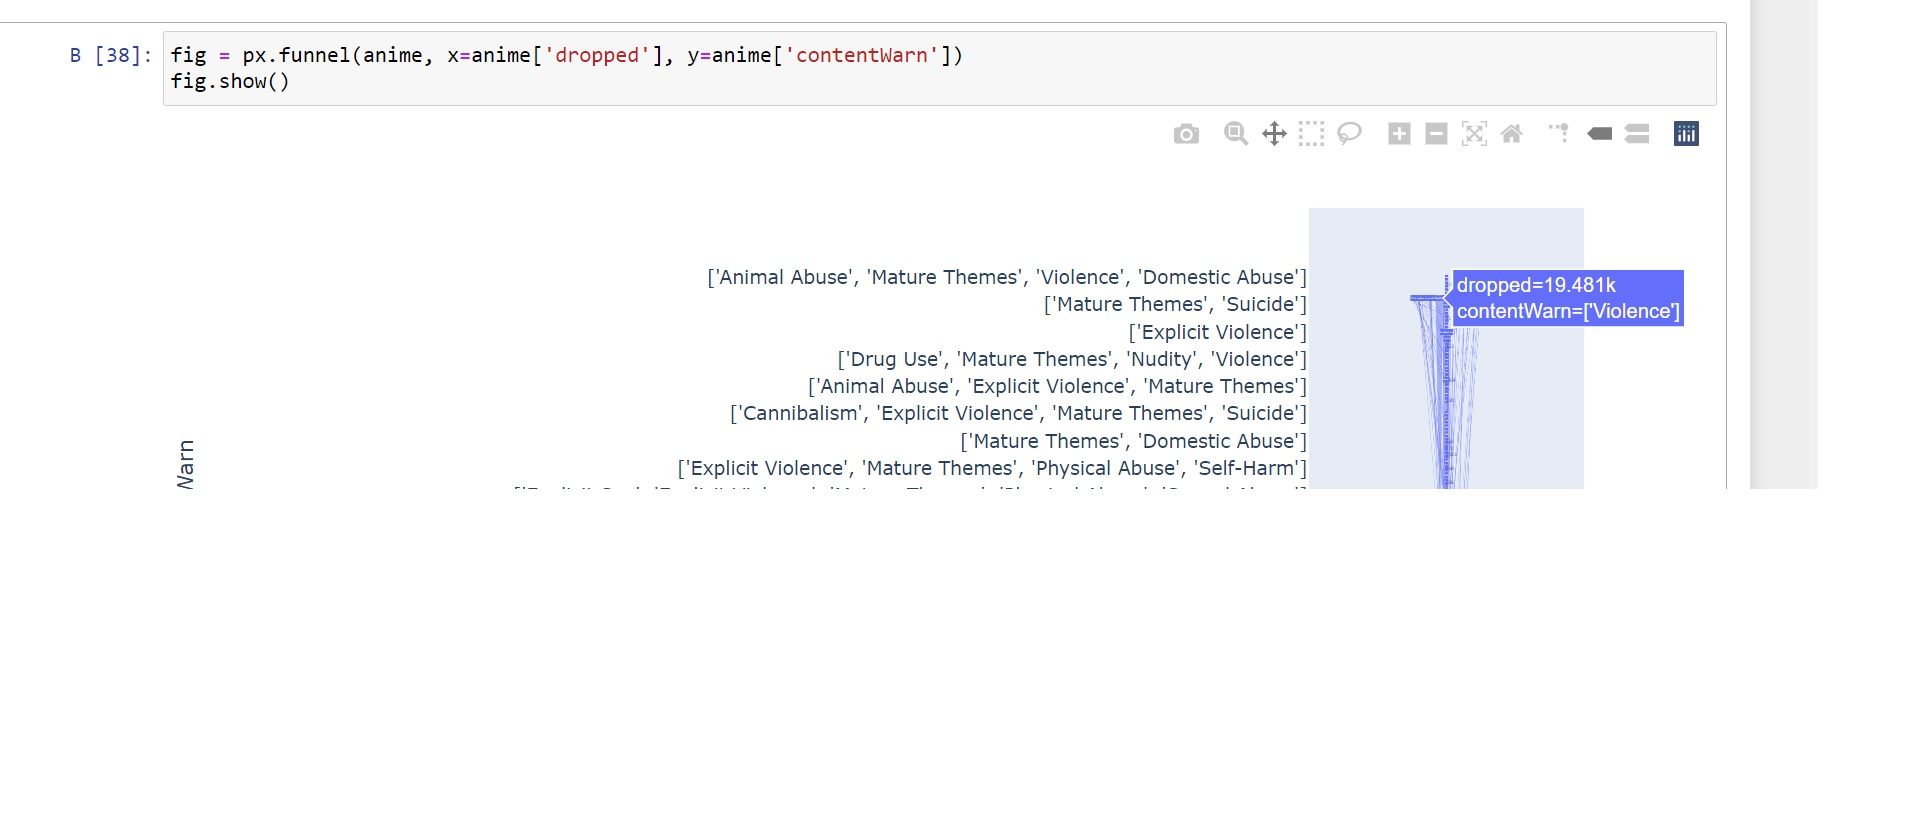

In case of 'Violence' content warning we can conclude that such a negative content affect choice of anime viewers

## Conclusion 

According to the analysis completed above we could sum up several points about anime series and movies

* Anime viewers prefer to watch TV series instead of other media types such movies, ova, tv specials, etc.

* There is a clear point that one of the reasons to drop anime is a lot of episodes in it

* Higher rating increase an interest rate of viewers as the result amount of watched people is also growing up

* Despite on the dropping huge animes, "Toei Animation" which produced list of "One Piece" products and parts has the highest ratings among other studios

* Negative tag and content decrease interest